# Power Outages: Language Frequency Charts
> Author: [Dawn Graham](https://dawngraham.github.io/)

Create an interactive chart showing frequency of power outage related words over time.

Versions used:
- Python 3.6.6
- bokeh 1.0.1
- matplotlib 3.0.2
- numpy 1.15.4
- pandas 0.23.4

## Import libraries

In [1]:
# General
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# For bokeh
from bokeh.palettes import Dark2
from bokeh.layouts import column
from bokeh.plotting import figure, output_file, show
from bokeh.models import RangeTool, Title, Legend, Span

## Set and preview dataframe

In [2]:
tweets = pd.read_csv('../data/combined_tweets_outages.csv')

# Set `timestamp` to datetime and set it to index
tweets['timestamp'] = pd.to_datetime(tweets['timestamp'])
tweets.set_index('timestamp', inplace=True)
tweets.head()

,id,likes,query,replies,retweets,text,user,outage,outage_state
timestamp,,,,,,,,,
2012-11-01 23:50:22,264152432282578945,1,EversourceMA OR EversourceNH OR VelcoVT OR nat...,1.0,3,"Tom May, CEO of Northeast Utilities, the paren...",EversourceMA,1,WV OH PA NJ CT MA NY DE MD IN KY MI
2012-11-01 23:45:13,264151136792109056,0,EversourceMA OR EversourceNH OR VelcoVT OR nat...,0.0,0,@NYGovCuomo @lipanews @nationalgridus @nyseand...,readyforthenet,1,WV OH PA NJ CT MA NY DE MD IN KY MI
2012-11-01 23:34:44,264148498352590849,1,EversourceMA OR EversourceNH OR VelcoVT OR nat...,0.0,1,Some amazing video from the Wareham microburst...,EversourceMA,1,WV OH PA NJ CT MA NY DE MD IN KY MI
2012-11-01 23:34:20,264148399190851584,0,EversourceMA OR EversourceNH OR VelcoVT OR nat...,0.0,0,@nationalgridus Call me if you need some help ...,sparky1000,1,WV OH PA NJ CT MA NY DE MD IN KY MI
2012-11-01 23:31:56,264147793147490304,0,EversourceMA OR EversourceNH OR VelcoVT OR nat...,1.0,8,Current PSNH statewide w/o power: 885. We're d...,EversourceNH,1,WV OH PA NJ CT MA NY DE MD IN KY MI


**Cleaning**: Noticed that dataframe contains sponsored tweets outside of our time of interest (September 2009 to end of December 2012). Filtering to dates of interest and resaving .csv.

In [3]:
tweets = tweets[:'2012']
tweets.to_csv('../data/combined_tweets_outages.csv')

## Create function to plot proportion of tweets with specific word(s)

In [4]:
# Function accepts dataframe, list of words, and time period to group by
def words_in_tweet(data, word_list, time_period='1 w'):
    
    # Generate empty dictionaries for tweets_freq and word_means
    tweets_freq = {}
    word_means = {}
    outage_means = {}
    
    # Set up figure size
    plt.figure(figsize=(15,3))
    
    # Iterate through each word in list
    for word in word_list:
        
        # Indicate if the word appears in each observation
        tweets_freq[word] = data['text'].str.contains(word, case = False)
        
        # Resample according to given time period
        word_means[word] = tweets_freq[word].resample(time_period).mean().replace(np.nan, 0)
        plt.plot(word_means[word], alpha = 0.8)
        
        # Show outages
        outage_means[word] = tweets['outage'].resample(time_period).mean().replace(np.nan, 0)
        plt.plot(outage_means[word], alpha = 0.2)
    
    # Add labels and show
    plt.xlabel('Date'); plt.ylabel('Frequency')
    plt.title('Language mentions over time')
    plt.legend(word_list)
    plt.show();
    
    return pd.DataFrame.from_dict(tweets_freq), pd.DataFrame.from_dict(word_means)

## Generate custom charts

Fill in `word_list` with desired words or phrases to check.  
Run function below to generate a static chart and return dataframes.  

Possible options to group by for `time_period` include:
- `'1 w'` (one week)
- `'1 d'` (one day)
- `'1 m'` (one month) etc. 

`tweets_freq` indicates if each observation contains the given word/phrase.  
`word_means` provides the proportion of tweets that include the given word/phrase within the given time period.

In [5]:
word_list = ['800', 'sandy', 'no power', 'nationalgridus', 'storm']

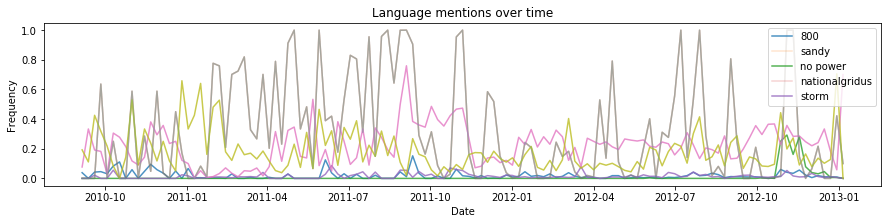

In [6]:
tweets_freq, word_means = words_in_tweet(tweets, word_list, '1 w')

In [7]:
tweets_freq.head()

,800,sandy,no power,nationalgridus,storm
timestamp,,,,,
2012-11-01 23:50:22,False,False,False,False,False
2012-11-01 23:45:13,False,False,False,True,False
2012-11-01 23:34:44,False,False,False,False,False
2012-11-01 23:34:20,False,False,False,True,False
2012-11-01 23:31:56,False,True,False,False,False


In [8]:
word_means.head()

,800,sandy,no power,nationalgridus,storm
timestamp,,,,,
2010-09-05,0.038462,0.0,0.000000,0.076923,0.192308
2010-09-12,0.000000,0.0,0.000000,0.333333,0.111111
2010-09-19,0.042553,0.0,0.021277,0.191489,0.425532
2010-09-26,0.045455,0.0,0.000000,0.181818,0.318182
2010-10-03,0.031250,0.0,0.000000,0.031250,0.218750


## Generate interactive chart with word frequency
This can show up to 8 words/phrases. To show more, use a different [color palette](https://bokeh.pydata.org/en/latest/docs/reference/palettes.html), i.e. `Category20`.  
The generated chart is NOT mobile-responsive.

In [9]:
# Generate main frequency plot
p = figure(plot_width=800, plot_height=500, tools="", toolbar_location=None,
           x_axis_type="datetime", x_axis_location="above",
           background_fill_color="#efefef", x_range=(word_means.index[0], word_means.index[-1]))

# Set titles and labels
p.title.text = 'Power outage related words on Twitter over time'
p.title.text_font_size = "25px"
p.yaxis.axis_label = 'Frequency'
p.add_layout(Title(text="Click on legend entries to hide the corresponding lines"), "above")

# Generate frequency chart for range tool
select = figure(title="Drag the middle and edges of the selection box to change the range above",
                plot_width=800, plot_height=130, y_range=p.y_range,
                x_axis_type="datetime", y_axis_type=None,
                tools="", toolbar_location=None, background_fill_color="#efefef")

# Set up range tool
range_tool = RangeTool(x_range=p.x_range)
range_tool.overlay.fill_color = "navy"
range_tool.overlay.fill_alpha = 0.2

# Create lines in each plot for each word
for col in word_means:
    name = col
    data = word_means[col]
    color = Dark2[8][word_means.columns.get_loc(col)]
    p.line(word_means.index, data, line_width=2, color=color, alpha=0.8, legend=name)
    select.line(word_means.index, data, color=color)
    
# Enable selection of lines to show in top plot
select.ygrid.grid_line_color = None
select.add_tools(range_tool)
select.toolbar.active_multi = range_tool

p.legend.location = "top_left"
p.legend.click_policy="hide"

# Output as .html
output_file("../images/outage_language.html", title="Power Outages: Language")
show(column(p, select))